In [3]:
!pip install ultralytics

import zipfile
import os

zip_dosyasi = '/content/yoda_odevlendirme_veriseti.yolov8.zip'
hedef_klasor = '/content/datasets'

if not os.path.exists(hedef_klasor):
    os.makedirs(hedef_klasor)

with zipfile.ZipFile(zip_dosyasi, 'r') as zip_ref:
    zip_ref.extractall(hedef_klasor)

print(f"İşlem tamam! Dosyalar '{hedef_klasor}' içine çıkartıldı.")

İşlem tamam! Dosyalar '/content/datasets' içine çıkartıldı.


In [4]:
import glob

yaml_files = glob.glob(f'{hedef_klasor}/**/data.yaml', recursive=True)

if yaml_files:
    yaml_yolu = yaml_files[0]

    with open(yaml_yolu, 'r') as f:
        print(f.read())
else:
    print("Hata")

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['blue_hexagon', 'blue_square', 'red_square', 'red_triangle']

roboflow:
  workspace: shapeandcolordetection
  project: shapeandcolor-ekw0q
  version: 7
  license: CC BY 4.0
  url: https://universe.roboflow.com/shapeandcolordetection/shapeandcolor-ekw0q/dataset/7


In [5]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

results = model.train(
    data=yaml_yolu,
    epochs=25,
    imgsz=640,
    batch=16,
    name='yoda_drone_egitimi'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fa

Eğitim Kayıp ve Başarı Grafikleri


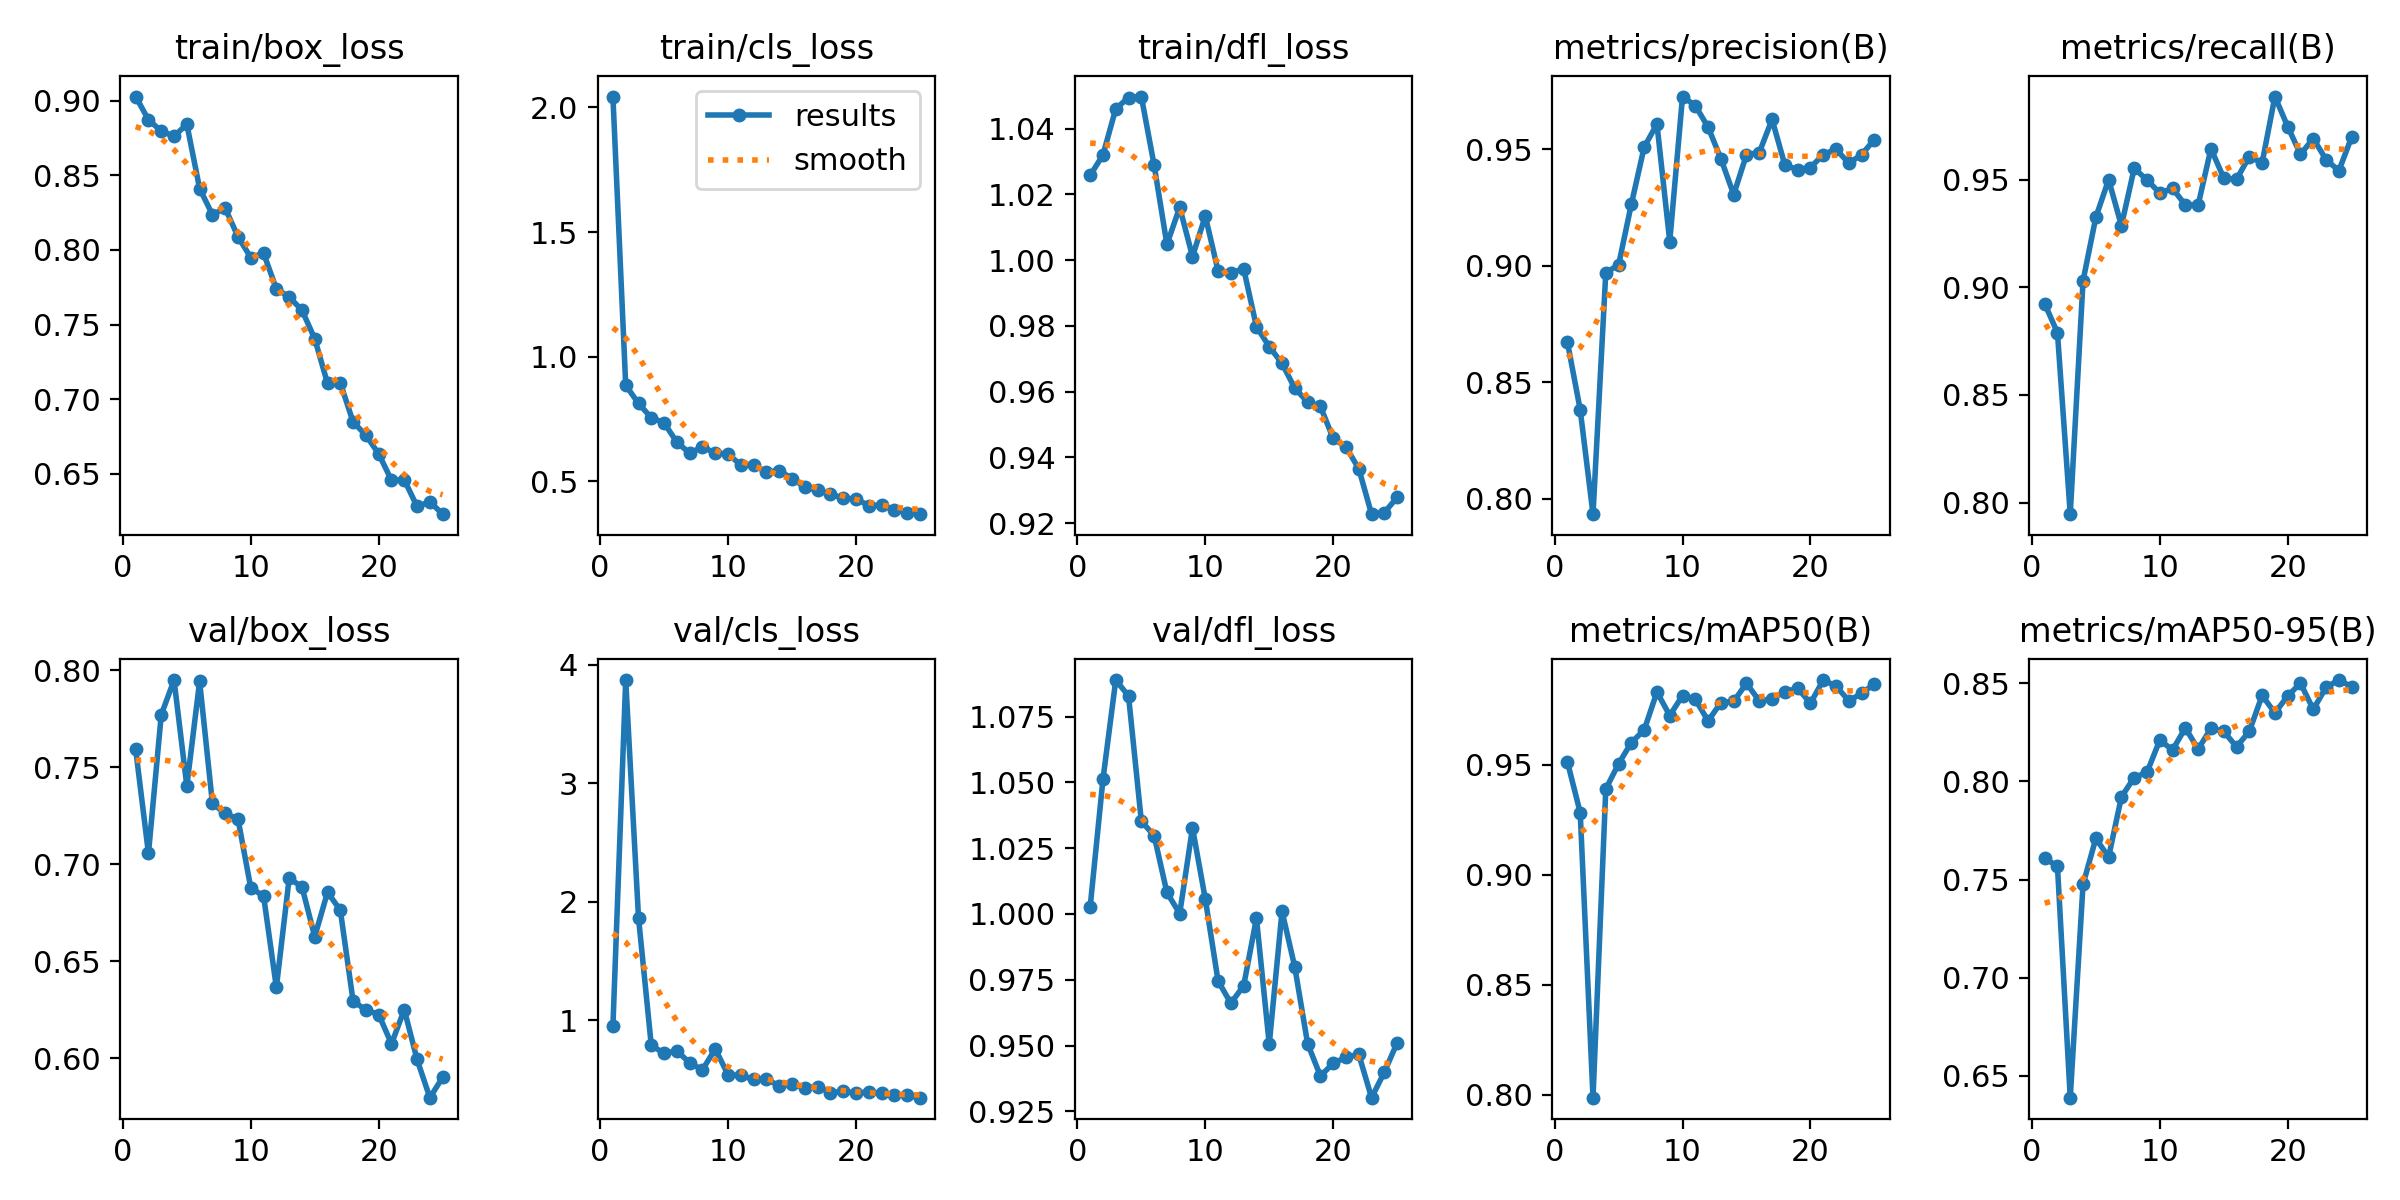


Confusion Matrix


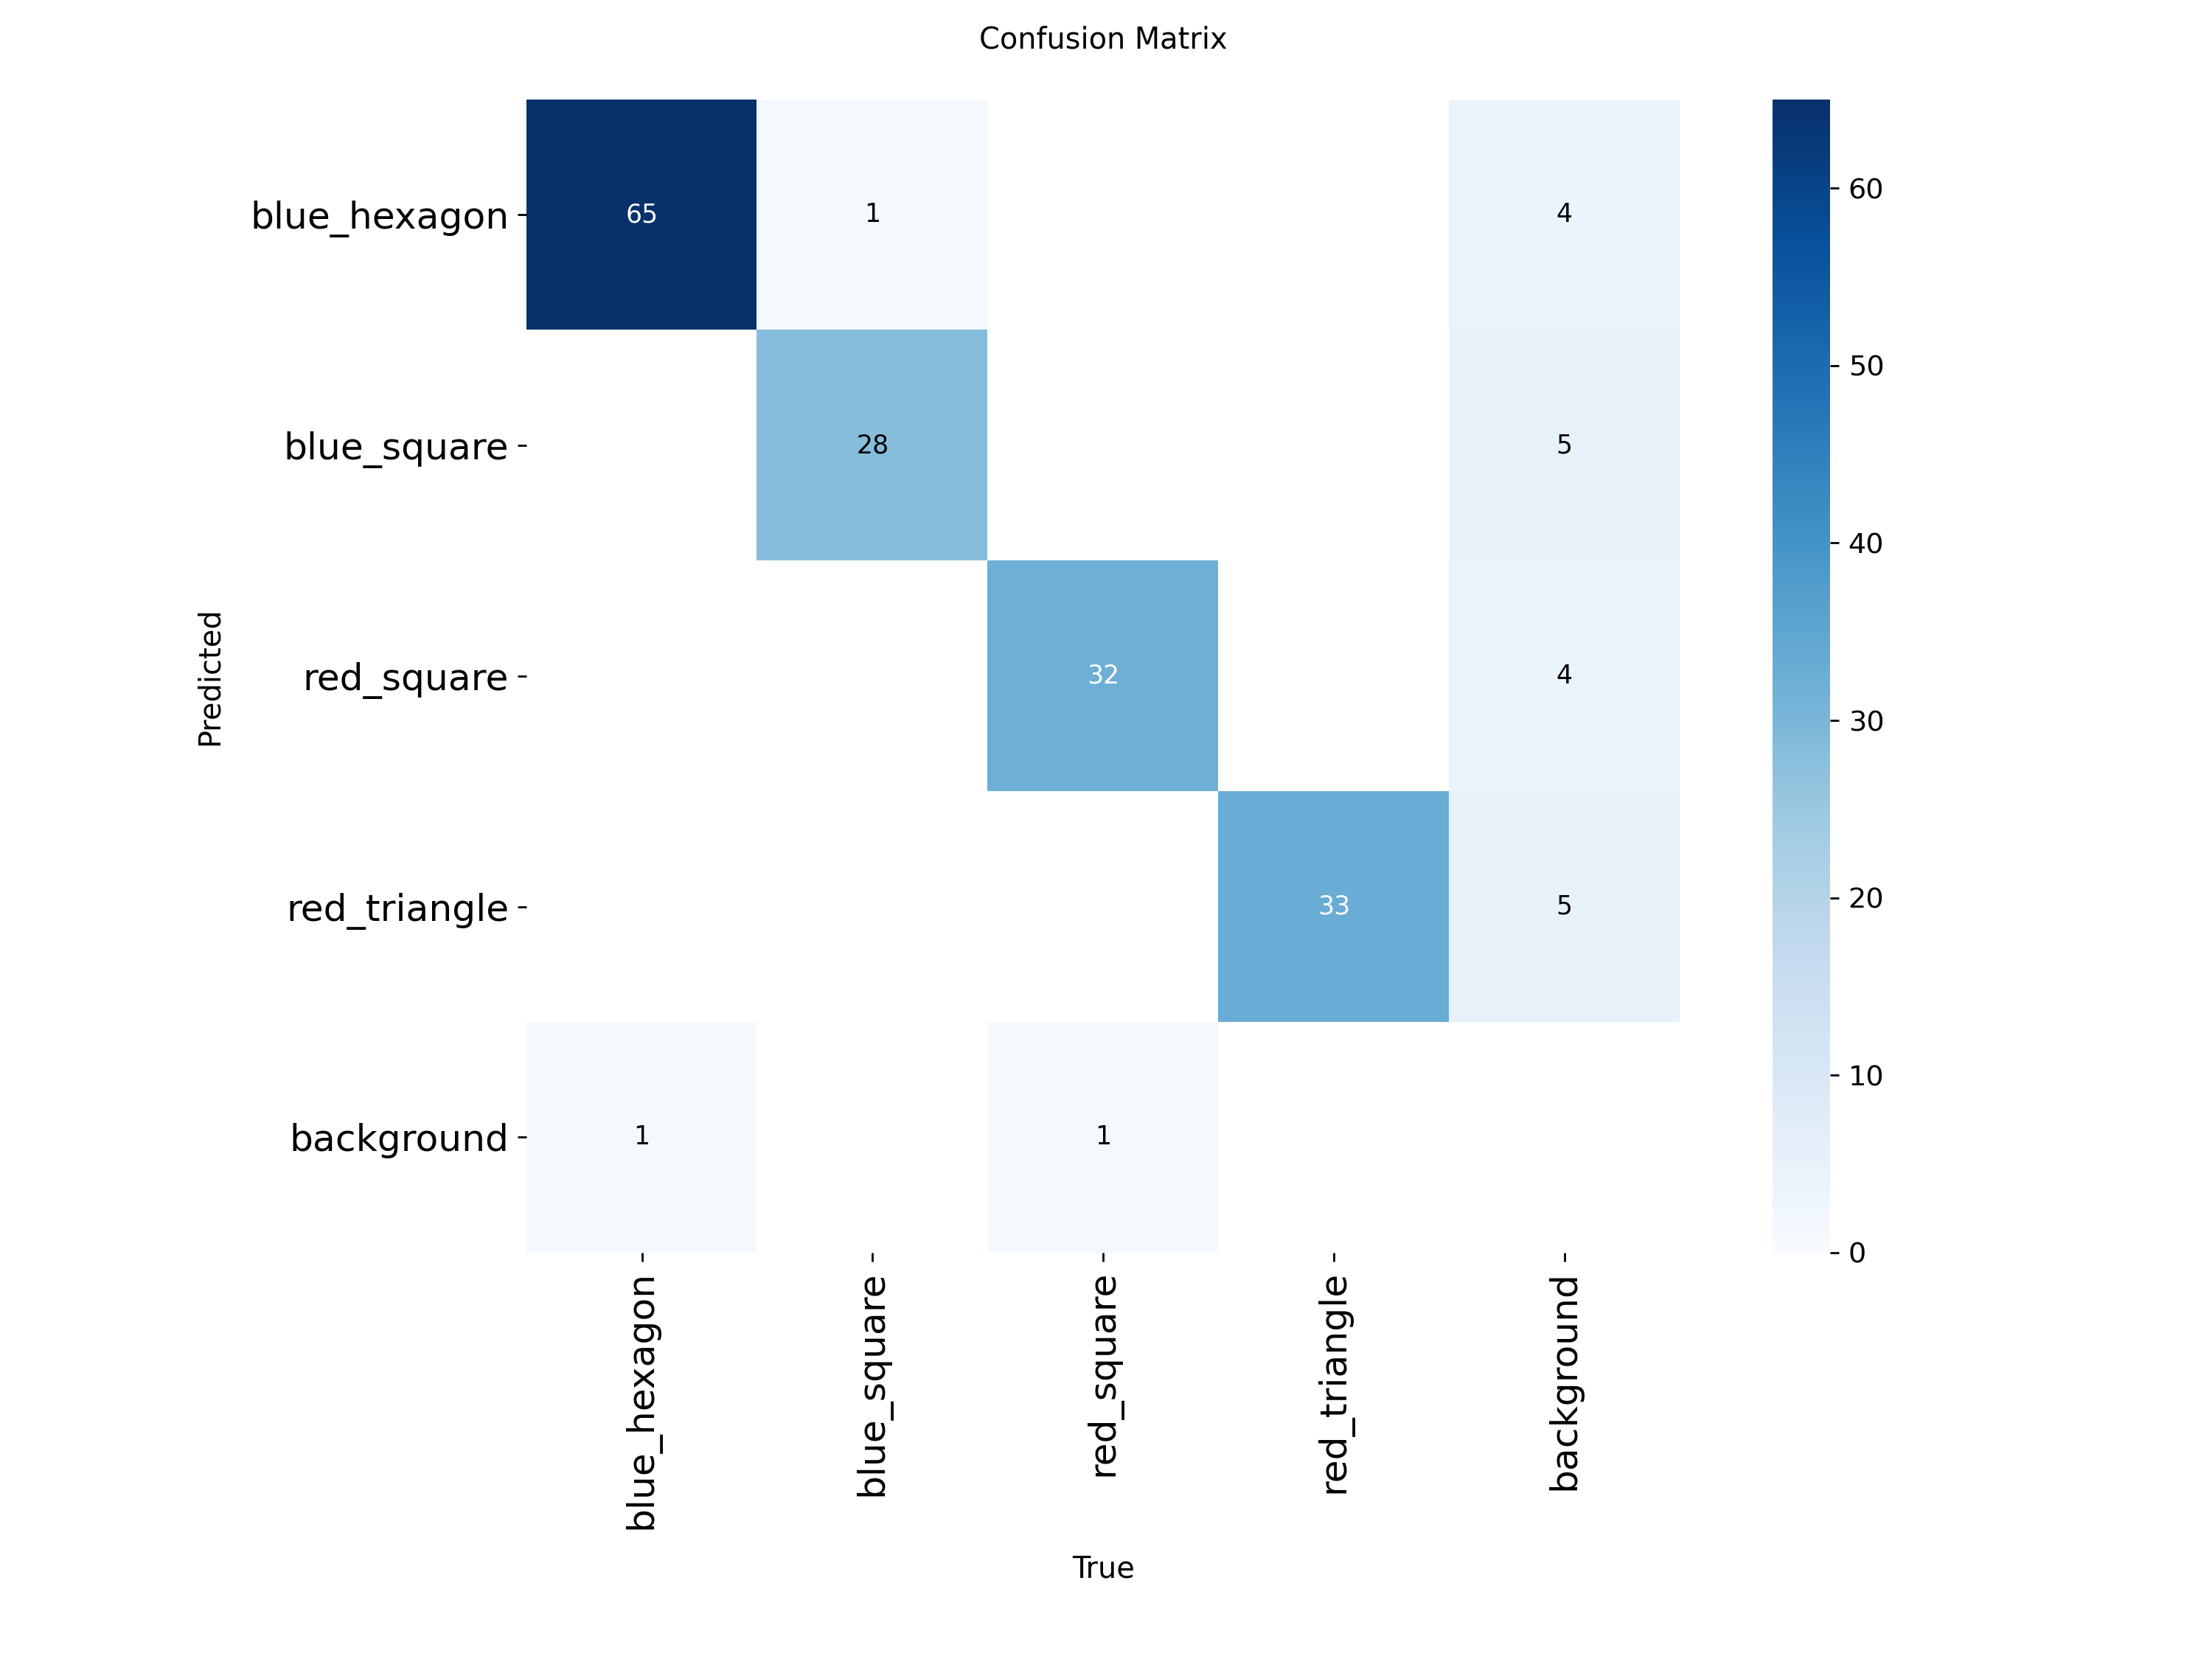

In [6]:
from IPython.display import Image, display

sonuc_yolu = '/content/runs/detect/yoda_drone_egitimi'

print("Eğitim Kayıp ve Başarı Grafikleri")
display(Image(filename=f'{sonuc_yolu}/results.png'))

print("\nConfusion Matrix")
display(Image(filename=f'{sonuc_yolu}/confusion_matrix.png'))

In [7]:
import random

test_resimleri = glob.glob(f'{hedef_klasor}/**/images/**/*.jpg', recursive=True)

if len(test_resimleri) > 0:

    secilen_resimler = random.sample(test_resimleri, 3)

    for img_path in secilen_resimler:
        print(f"\nResim: {os.path.basename(img_path)}")

        tahminler = model.predict(source=img_path, conf=0.40, save=True)

        for t in tahminler:
            im_array = t.plot()
            display(Image(data=t.plot(img=im_array)[..., ::-1]))
else:
    print("Bulunamadı.")


Resim: 28_Temmuz_Ucus_2_3_frame_0957_jpg.rf.daac9af81bf82540c0a681236d3ad4b6.jpg

image 1/1 /content/datasets/valid/images/28_Temmuz_Ucus_2_3_frame_0957_jpg.rf.daac9af81bf82540c0a681236d3ad4b6.jpg: 640x640 1 blue_hexagon, 16.3ms
Speed: 4.2ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


ValueError: ndarray is not C-contiguous

ValueError: ndarray is not C-contiguous

<IPython.core.display.Image object>


Resim: 28_Temmuz_Ucus_2_2_frame_0371_jpg.rf.e0c3e38ed9017f0d4f78bad20c4b4796.jpg

image 1/1 /content/datasets/train/images/28_Temmuz_Ucus_2_2_frame_0371_jpg.rf.e0c3e38ed9017f0d4f78bad20c4b4796.jpg: 640x640 1 blue_hexagon, 1 blue_square, 16.4ms
Speed: 3.4ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


ValueError: ndarray is not C-contiguous

ValueError: ndarray is not C-contiguous

<IPython.core.display.Image object>


Resim: 30August_Flight_1_2frame_0461_jpg.rf.d2765c3e8315acf9fb198c479d6fd6b1.jpg

image 1/1 /content/datasets/train/images/30August_Flight_1_2frame_0461_jpg.rf.d2765c3e8315acf9fb198c479d6fd6b1.jpg: 640x640 (no detections), 16.3ms
Speed: 2.8ms preprocess, 16.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


ValueError: ndarray is not C-contiguous

ValueError: ndarray is not C-contiguous

<IPython.core.display.Image object>

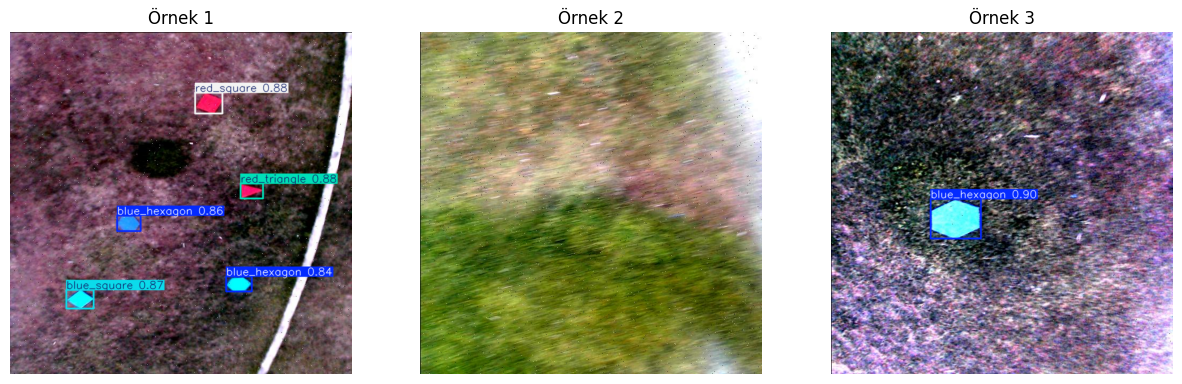

In [8]:
import glob
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

test_resimleri = glob.glob('/content/datasets/**/images/**/*.jpg', recursive=True)

if len(test_resimleri) > 0:
    secilen_resimler = random.sample(test_resimleri, 3)

    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(secilen_resimler):
        results = model.predict(source=img_path, conf=0.40, verbose=False)

        resim_sonuc = results[0].plot()
        resim_rgb = cv2.cvtColor(resim_sonuc, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 3, i+1)
        plt.imshow(resim_rgb)
        plt.axis('off')
        plt.title(f"Örnek {i+1}")

    plt.show()
else:
    print("hata")